### What is Anova Test

Anova Test can be considered generalized T-Test for multiple group. While T-test is mainly used to compare the means of two group, ANOVA test is used to compare mean of multiple group. If we use T-test for comparing mean of more than two gropus, it is highly likely that error will get compounded; therefore it is not reliable to use for multiple class

### Assumptions of ANOVA Test

1. The observations are independent of each other and are randomly obtained.
2. The data for each group is randomly distributed
3. Varience among the group are approximately equal

### Types of ANOVA test

1. One way ANOVA: It is used to test two group to see if there is a difference between them.
2. Two way ANOVA without replication: Used when you have one group and you'r double testing that same group. For example, you are testing one set of individuals before and after they make a medication to see if it works or not
3. Two way ANOVA with replication: TWo groups and the members of those groups are doing more than one thing.

### One way ANOVA

A one way ANOVA is used to compare two means from two or more independent(unrelated) groups using F-distribution. The null hypothesis is that means of every group is equal. Alternative hypothesis is atleast mean of one group is significantly different than other.

### Limitations of the one way ANOVA

A one way ANOVA is able to find if there is a group with the mean significantly different than other; but it is unable to point out which particular group is with significant mean. For that we carry out ad hoc test.

In [77]:
#coding
#importing related library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline

In [78]:
#calling data
data = pd.read_excel('Concrete_Data.xls')
data.shape       #return the number of rows and column


(1030, 9)

We have data of with 1030 rows and 9 column.

In [79]:
#we will see some sample data from all of 1030 rows
data.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


From the above data, we want to do ANOVA test of just three column(Cement component, Coarse Aggregate component and Fine aggregate component)

In [80]:
#we will change the name of above mentioned columna into simple name like Cement,Coarse and Fine
data1 = data.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)':'Cement','Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse','Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine'})
data1.head()

,Cement,Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse,Fine,Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


We can see column with simple name 'Cement' ,'Coarse' and 'Fine'.
Now, we extract only those column for ANOVA test and make separate dataframe

In [81]:
df = data1.filter(['Cement','Coarse','Fine'],axis=1)
print(df)

      Cement  Coarse   Fine
0      540.0  1040.0  676.0
1      540.0  1055.0  676.0
2      332.5   932.0  594.0
3      332.5   932.0  594.0
4      198.6   978.4  825.5
...      ...     ...    ...
1025   276.4   870.1  768.3
1026   322.2   817.9  813.4
1027   148.5   892.4  780.0
1028   159.1   989.6  788.9
1029   260.9   864.5  761.5

[1030 rows x 3 columns]


In above step, We made simple dataframe with 3 column extracting data from origial file. It has 1030 values for each columns

### Descriptive Statistics

We will see descriptive statistics for all column 'Cement', 'Coarse' and 'Fine'

In [82]:
df.describe()

,Cement,Coarse,Fine
count,1030.000000,1030.000000,1030.000000
mean,281.165631,972.918592,773.578883
std,104.507142,77.753818,80.175427
min,102.000000,801.000000,594.000000
25%,192.375000,932.000000,730.950000
50%,272.900000,968.000000,779.510000
75%,350.000000,1029.400000,824.000000
max,540.000000,1145.000000,992.600000


We see from descriptive statistics that there is significant difference in mean. But, we want to confirm it by ANOVA test. Also we want to see in visual representation form in matplotlib.

### Data Visualization

<Figure size 432x288 with 0 Axes>

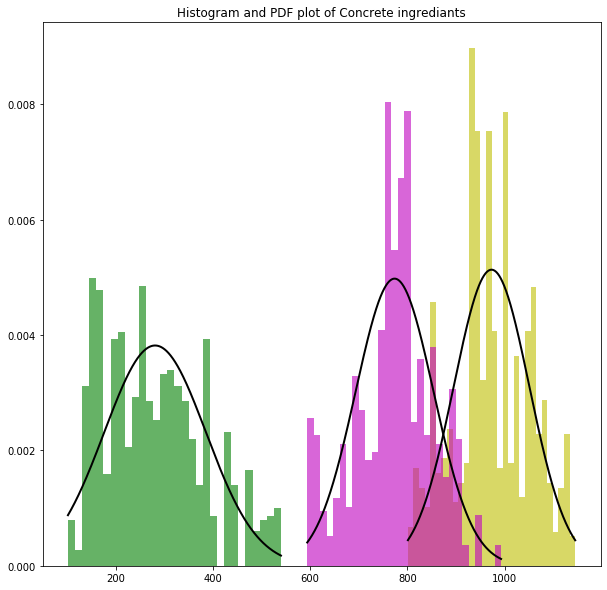

In [86]:
#plotting histogram of all column
#plotting pdf of all column
plt.figure()
plt.figure(figsize=(10,10))
plt.hist(df['Cement'],bins=30,density=True,alpha=0.6,color='g') #plotting histogram for 'Cement'
plt.hist(df['Coarse'],bins=30,density=True,alpha=0.6,color='y') #plotting histogram for 'Coarse'
plt.hist(df['Fine'],bins=30,density=True,alpha=0.6,color='m')   #plotting histogram for 'Fine'

mu1,std1 = stats.norm.fit(df['Cement'])
mu2,std2 = stats.norm.fit(df['Coarse'])
mu3,std3 = stats.norm.fit(df['Fine'])

min1,max1 = np.min(df['Cement']),np.max(df['Cement'])
min2,max2 = np.min(df['Coarse']),np.max(df['Coarse'])
min3,max3 = np.min(df['Fine']),np.max(df['Fine'])

x1 = np.linspace(min1,max1,1030)
x2 = np.linspace(min2,max2,1030)
x3 = np.linspace(min3,max3,1030)

p1 = stats.norm.pdf(x1,mu1,std1)   #creating pdf for 'Cement'
p2 = stats.norm.pdf(x2,mu2,std2)   #creating pdf for 'Coarse'
p3 = stats.norm.pdf(x3,mu3,std3)   #creating pdf for 'Fine'

#plotting gaussian curve
plt.plot(x1,p1,'k',linewidth=2)
plt.plot(x2,p2,'k',linewidth=2)
plt.plot(x3,p3,'k',linewidth=2)

plt.title('Histogram and PDF plot of Concrete ingrediants')

plt.show()





### ANOVA Test

From the above visualization and descriptive statisitcs, we can say that there is significance difference in mean quantity of 'cement','Coarse aggregate' and 'Fine aggregate'. 

Nevertheless, we will use ANOVA to reach conclusion

(1.)Null hypothesis: There is no significance difference between mean of three ingrediants.

(2.)Alternative hypothesis: One of either Cement,Concrete and Fine is significantly more than other.

In [87]:
from scipy.stats import f_oneway  #f_oneway gives value of F-statistics and Pvalue
f_oneway(df['Cement'],df['Coarse'],df['Fine'])


F_onewayResult(statistic=16745.76808017809, pvalue=0.0)

Here F-statisitcs = 16745.768 and PValue = 0.0 which is clearly less than alpha(assume = 0.05). Hence we reject null hypothesis. That is we can say there is significant evidence to show mean value of cement, coarse aggregate and fine aggregate differ sufficently from each other while manufacturing concrete. 

### Comments

 1. As shown by histogram, cement data is not perfectly gaussian. It is slightly skewed towards left. Also, mean quantity of cement is way less than Coarse aggregate and Fine aggregate.
 
 Since, our assumption for ANOVA testing is that population should be normally distributed; this slightly skewed cement distribution may not give proper results.
 
 